In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
# Load the data using Pandas
df = pd.read_csv('job-market_W2.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columns")

#TODO: Visualize the top 10 first Rows
df.head(3)

The Dataset consists of:  40789  rows and  13  columns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN


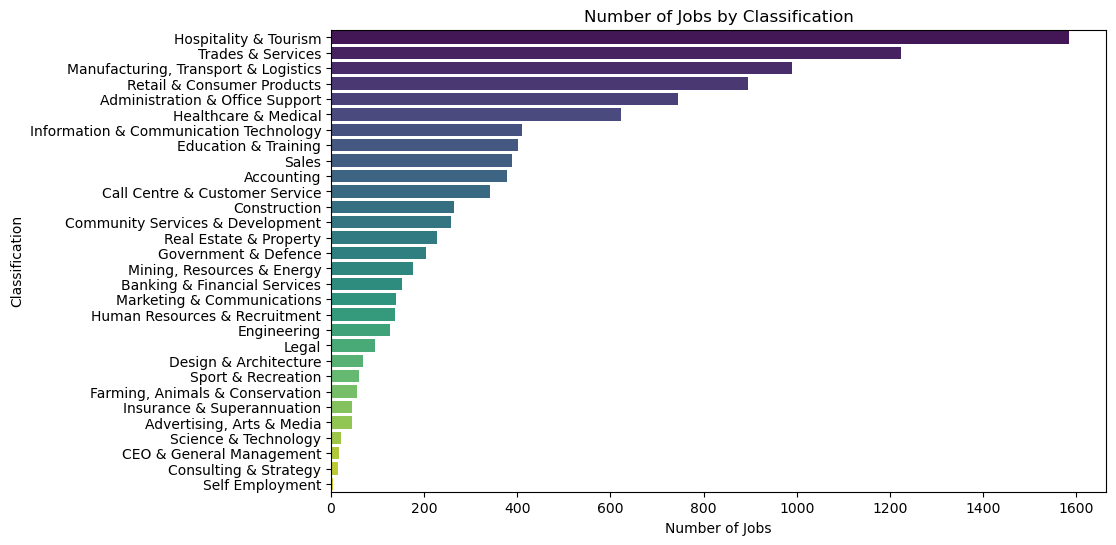

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(y='Classification', data=df, order=df['Classification'].value_counts().index, palette='viridis')
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of Jobs')
plt.ylabel('Classification')
plt.show()

In [11]:
import matplotlib

#create dataframe for salary ranges
df_salaryRanges = df[df['LowestSalary'].isna()==False]
df_salaryRanges = df_salaryRanges.groupby('LowestSalary').count()
df_salaryRanges['Label'] = df_salaryRanges.index
df_salaryRanges['Count'] = df_salaryRanges['Id']

df_salaryRanges.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,Label,Count
LowestSalary,,,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0,3894
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0,1842
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0,2519
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0,1844


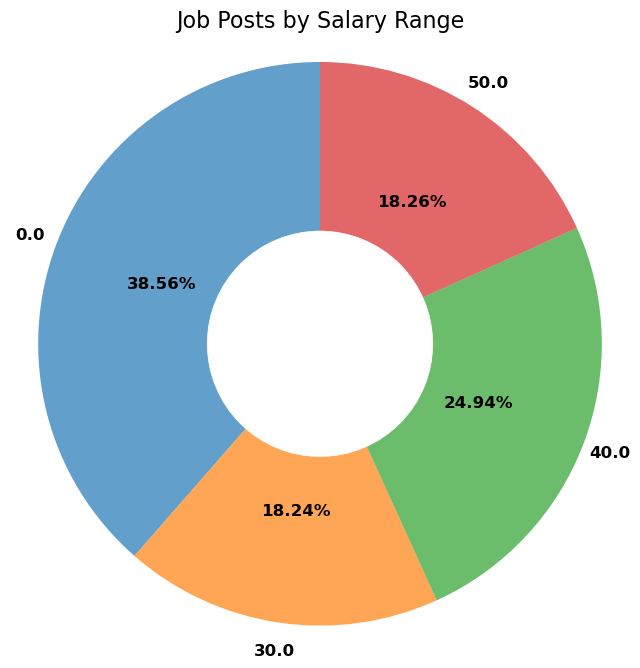

In [20]:
# Salary ranges plot
fig, ax = plt.subplots(figsize=(8, 8))

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Pie chart with custom colors
wedges, texts, autotexts = ax.pie(df_salaryRanges['Count'], 
                                  colors=custom_colors,
                                  labels=df_salaryRanges['Label'], 
                                  wedgeprops={'alpha': 0.7}, 
                                  autopct=lambda p: '{:.2f}%'.format(p),
                                  startangle=90,
                                  textprops=dict(color="black", fontsize=12, fontweight='bold', ha='center'))

# Aesthetics
ax.set_title('Job Posts by Salary Range', loc='center', fontsize=16)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a smaller circle to make it a smaller donut
center_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=0.5)
ax.add_patch(center_circle)

plt.show()
